In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler,normalize,scale
import matplotlib.pyplot as plt
from random import seed
from random import randrange
from math import exp

In [2]:
def get_data_from_csv(csv_filepath = "diabetes.csv"):
    
    with open(csv_filepath) as csv_file:
        df = pd.read_csv (csv_filepath)
        return df
    
def train_test_val_split(features, Traget):
    # Spliting the dataset into train and test datasets. 60% of the dataset is used for training and 40% is used for splitting into testing and validation. 
    train_x, test_val_x, train_y, test_val_y = train_test_split(features,Target, train_size=0.6,random_state=1)

    # Splitting the remaining 40% dataset to 20% test and 20% validation sets.
    test_x, val_x, test_y, val_y = train_test_split(test_val_x, test_val_y, train_size = 0.5, random_state = 1)
    
    return train_x, train_y, val_x, val_y, test_x, test_y

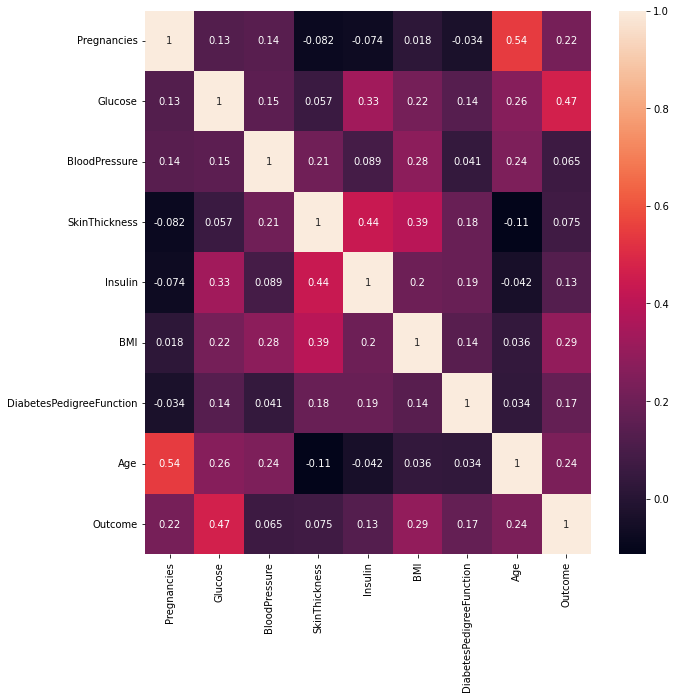

In [3]:
data = get_data_from_csv()
data.head()
data.shape
correlation_matrix = data.corr()

#plotting the Correlation Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [4]:
from sklearn.preprocessing import scale

#converting into a numpy Matrix to feed into the model
features = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].to_numpy()
Target = data['Outcome'].to_numpy().T
features = scale(features)
print("Shape of feature matrix",features.shape)
print("Shape of Target matrix",Target.shape)
features = scale(features)
train_x, train_y, val_x, val_y, test_x, test_y = train_test_val_split(features, Target)
print('Total number of data items:', len(data))
print('\nNumber of data points in the training dataset:', len(train_x))
print('\nNumber of data points in the test dataset:', len(test_x))
print('\nNumber of data points in the val dataset:', len(val_x))
print('\nShape of the training dataset:', train_x.shape)
print('\nShape of the test dataset:', test_x.shape)
print('\nShape of the val dataset:', val_x.shape)
print('\n Training dataset type:', type(train_x))
print('\n Test dataset type:', type(test_x))



Shape of feature matrix (768, 8)
Shape of Target matrix (768,)
Total number of data items: 768

Number of data points in the training dataset: 460

Number of data points in the test dataset: 154

Number of data points in the val dataset: 154

Shape of the training dataset: (460, 8)

Shape of the test dataset: (154, 8)

Shape of the val dataset: (154, 8)

 Training dataset type: <class 'numpy.ndarray'>

 Test dataset type: <class 'numpy.ndarray'>


In [5]:
def sigmoid(gamma):
        return 1/(1 + np.exp(-gamma))
    
# def find_min(row):
#     minim = row[0]
#     for i in range(row.shape[-1]):
#         if row[i] < minim:
#             minim = row[i]
#     return minim

# def find_max(row):
#     maxim = row[0]
#     for i in range(row.shape[-1]):
#         if row[i] > maxim:
#             maxim = row[i]
#     return maxim
        
# Rescale dataset columns to the range 0-1
# def normalize_dataset(dataset):

#     for row in range(len(dataset)):
#         value_min = find_min(dataset[row])
#         value_max = find_max(dataset[row])
#         for c in range(dataset[row].shape[-1]):
#             dataset[row,c] = (dataset[row][c] - value_min) / (value_max - value_min)
#     return dataset
 

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
#     embed()
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0
 
# Evaluate algorithm on test set
def evaluate(dataset_x, dataset_y, w, intercept):
    
    predicted = predict(dataset_x,w,intercept)
    accuracy = accuracy_metric(dataset_y, predicted)
    
    return accuracy
 
# Make a prediction with coefficients
def predict(dataset,w,intercept):
    model = np.dot(dataset,w) + intercept
    y_hat = sigmoid(model)
    
    return np.round(y_hat)#1.0 / (1.0 + exp(-yhat))
 

def fit(train_x,train_y, test_x,test_y, n_epoch, learning_rate):
    w = np.zeros(train_x.shape[-1])
#     w = w.transpose()
    intercept = 0


    
    for epoch in range(int(n_epoch)):
        if epoch%50 == 0:
            learning_rate/=10
            
        model = np.dot(train_x, w) + intercept
        y_hat = sigmoid(model)
        
        dw = (1/len(train_x[0])) * np.dot(train_x.T,(y_hat-train_y))
        db = (1/len(train_x[0])) * np.sum(y_hat-train_y)
        
        intercept -= learning_rate*db
        w -= learning_rate*dw
        
        loss_accuracy(w, intercept, train_x, train_y, val_x, val_y)
    return w, intercept
    
def loss_accuracy(w, intercept, train_x, train_y, val_x, val_y):
    
    
    train_accuracy = evaluate(train_x, train_y, w, intercept)
    history['accuracy_train'].append(train_accuracy)
    

    val_accuracy = evaluate(val_x,val_y, w, intercept)
    history['accuracy_val'].append(val_accuracy)
    

seed(2)

history = {}
history['accuracy_train'] = []
history['accuracy_val'] = []

l_rate = 0.101
n_epoch = 100

#Train_model
w, intercept = fit(train_x,train_y,test_x,test_y, n_epoch, l_rate)

accuracy = evaluate(test_x, test_y, w, intercept)
print('Test set accuracy: %s' % accuracy)

accuracy = evaluate(train_x, train_y, w, intercept)
print('Train set accuracy: %s' % accuracy)

accuracy = evaluate(val_x, val_y, w, intercept)
print('Val set accuracy: %s' % accuracy)



Test set accuracy: 78.57142857142857
Train set accuracy: 78.04347826086956
Val set accuracy: 74.02597402597402


[76.52173913043478, 76.08695652173914, 76.30434782608695, 76.52173913043478, 76.30434782608695, 76.95652173913044, 76.73913043478261, 76.30434782608695, 76.30434782608695, 76.73913043478261, 77.39130434782608, 78.04347826086956, 78.04347826086956, 78.26086956521739, 78.47826086956522, 78.47826086956522, 78.69565217391305, 78.91304347826087, 78.47826086956522, 78.47826086956522, 78.26086956521739, 78.47826086956522, 78.47826086956522, 78.26086956521739, 78.26086956521739, 78.26086956521739, 78.26086956521739, 78.26086956521739, 78.04347826086956, 78.04347826086956, 78.04347826086956, 78.04347826086956, 78.04347826086956, 77.82608695652173, 77.6086956521739, 77.82608695652173, 77.82608695652173, 77.82608695652173, 77.82608695652173, 77.82608695652173, 78.04347826086956, 78.04347826086956, 78.04347826086956, 78.04347826086956, 78.04347826086956, 78.04347826086956, 78.04347826086956, 78.04347826086956, 78.04347826086956, 78.04347826086956, 78.04347826086956, 78.04347826086956, 78.043478260

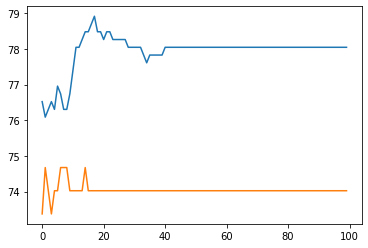

In [6]:
%matplotlib inline

print(history['accuracy_train']) 
print(history['accuracy_val']) 
plt.plot(history['accuracy_train'])
plt.plot(history['accuracy_val'])
plt.show()



In [7]:
# Neural Network
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.layers.core import Dropout
import tensorflow as tf

In [8]:
# defining the keras model
model_wr = Sequential()
model_wr.add(Dense(10, input_dim=8, activation='relu'))
model_wr.add(Dense(8, activation='relu'))
model_wr.add(Dense(4, activation='relu'))
model_wr.add(Dense(1, activation='sigmoid'))


2021-10-10 23:46:42.312210: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
#### defining the keras model with regularizations

# model with Dropout
model_dropout = Sequential()
model_dropout.add(Dense(10, input_dim=8, activation='relu')) #Original neuorons -10
model_dropout.add(Dropout(0.1))# Original - 0.1
model_dropout.add(Dense(8, activation='relu'))#Original neuorons -8
model_dropout.add(Dropout(0.1))# Original - 0.1
model_dropout.add(Dense(4, activation='relu'))#Original neuorons -4
model_dropout.add(Dropout(0.1))# Original - 0.1
model_dropout.add(Dense(1, activation='sigmoid'))

                  


In [11]:
# model with l1 regularization
model_l1 = Sequential()
model_l1.add(Dense(10, input_dim=8, activation='relu',kernel_regularizer=regularizers.l1(0.0001)))
model_l1.add(Dense(8, activation='relu',kernel_regularizer=regularizers.l1(0.0001)))
model_l1.add(Dense(4, activation='relu',kernel_regularizer=regularizers.l1(0.0001)))
model_l1.add(Dense(1, activation='sigmoid'))



In [12]:
# model with l2 regularization
model_l2 = Sequential()
model_l2.add(Dense(10, input_dim=8, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model_l2.add(Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model_l2.add(Dense(4, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model_l2.add(Dense(1, activation='sigmoid'))

In [13]:
%matplotlib inline
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.5*1e-2,
    decay_steps=10,
    decay_rate=0.9)
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_wr.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), metrics=['accuracy'])
history_wr = model_wr.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=200, batch_size=1, verbose = 0)



2021-10-10 23:48:13.123980: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


5/5 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.7013
Validation Accuracy: 70.13
16/16 [==============================] - 0s 1ms/step - loss: 0.6323 - accuracy: 0.6753
Test Accuracy: 67.53


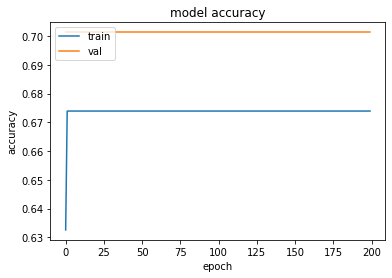

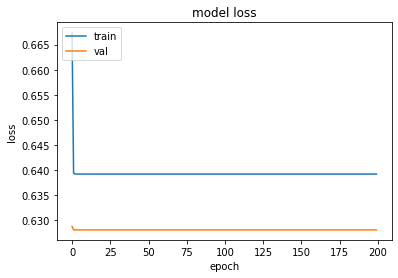

In [14]:
history = history_wr
model = model_wr

# evaluate the keras model on validation
_, accuracy = model.evaluate(val_x, val_y)
print('Validation Accuracy: %.2f' % (accuracy*100))

# evaluate the keras model on test
_, accuracy = model.evaluate(test_x, test_y,steps=16,batch_size = 10)
print('Test Accuracy: %.2f' % (accuracy*100))

# For acccuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
model_dropout.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
history_dropout = model_dropout.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=200, batch_size=3, verbose = 0)

5/5 [==============================] - 0s 1ms/step - loss: 0.5246 - accuracy: 0.7597
Validation Accuracy: 75.97
16/16 [==============================] - 0s 754us/step - loss: 0.5284 - accuracy: 0.7662
Test Accuracy: 76.62


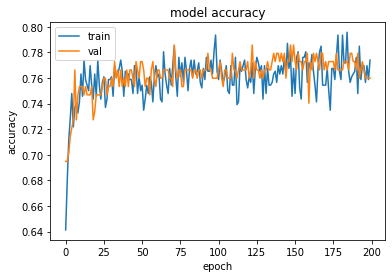

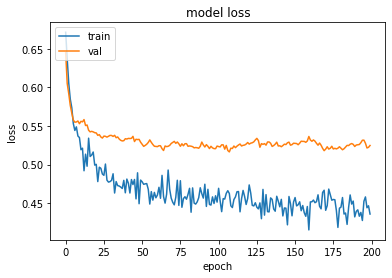

In [16]:

history = history_dropout
model = model_dropout
# evaluate the keras model on validation
_, accuracy = model.evaluate(val_x, val_y)
print('Validation Accuracy: %.2f' % (accuracy*100))

# evaluate the keras model on test
_, accuracy = model.evaluate(test_x, test_y,steps=16,batch_size = 10)
print('Test Accuracy: %.2f' % (accuracy*100))
# summarize history of model with dropout
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
model_l1.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
history_l1 = model_l1.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=200, batch_size=3, verbose = 0)

5/5 [==============================] - 0s 960us/step - loss: 0.7339 - accuracy: 0.6883
Validation Accuracy: 68.83
16/16 [==============================] - 0s 956us/step - loss: 0.6344 - accuracy: 0.7208
Test Accuracy: 72.08


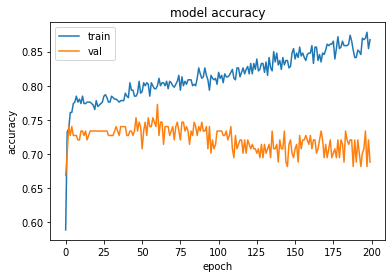

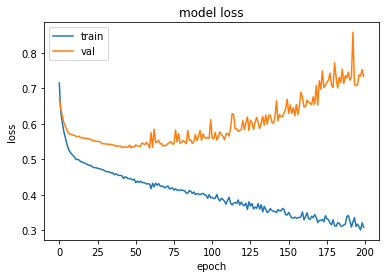

In [18]:
history = history_l1
model = model_l1
# evaluate the keras model on validation
_, accuracy = model.evaluate(val_x, val_y)
print('Validation Accuracy: %.2f' % (accuracy*100))

# evaluate the keras model on test
_, accuracy = model.evaluate(test_x, test_y,steps=16,batch_size = 10)
print('Test Accuracy: %.2f' % (accuracy*100))
# L1 regularization results
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

5/5 [==============================] - 0s 930us/step - loss: 0.7690 - accuracy: 0.7792
Validation Accuracy: 77.92
16/16 [==============================] - 0s 805us/step - loss: 0.7012 - accuracy: 0.7792
Test Accuracy: 77.92


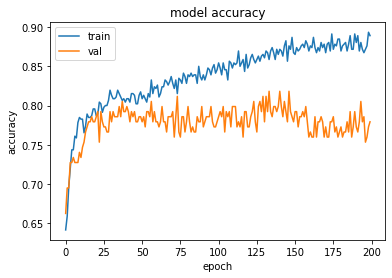

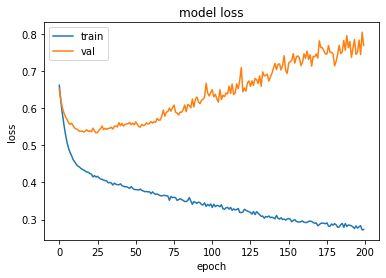

In [19]:
model_l2.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
history_l2 = model_l2.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=200, batch_size=3, verbose = 0)
history = history_l2
model = model_l2
# evaluate the keras model on validation
_, accuracy = model.evaluate(val_x, val_y)
print('Validation Accuracy: %.2f' % (accuracy*100))

# evaluate the keras model on test
_, accuracy = model.evaluate(test_x, test_y,steps=16,batch_size = 10)
print('Test Accuracy: %.2f' % (accuracy*100))
# L2 Regularization results
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

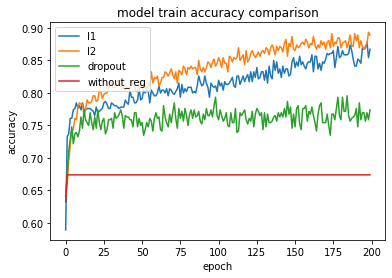

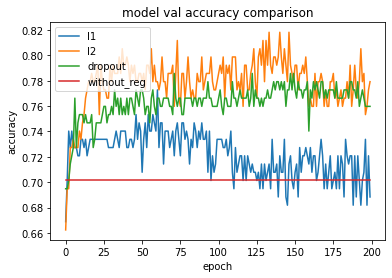

In [20]:
# Comparison L1, L2, Dropout, without regularization

plt.plot(history_l1.history['accuracy'])

plt.plot(history_l2.history['accuracy'])

plt.plot(history_dropout.history['accuracy'])

plt.plot(history_wr.history['accuracy'])



plt.title('model train accuracy comparison')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['l1', 'l2', 'dropout', 'without_reg'], loc='upper left')
plt.show()


# Comparison L1, L2, Dropout, without regularization

plt.plot(history_l1.history['val_accuracy'])

plt.plot(history_l2.history['val_accuracy'])

plt.plot(history_dropout.history['val_accuracy'])

plt.plot(history_wr.history['val_accuracy'])



plt.title('model val accuracy comparison')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['l1', 'l2', 'dropout', 'without_reg'], loc='upper left')
plt.show()